# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: A real-world data journey
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd
# required for reading into pandas:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# data urls - posted on the CDC website

marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'
divorce_url  = 'https://www.cdc.gov/nchs/data/dvs/state-divorce-rates-90-95-99-19.xlsx'

# Import the marriage data

In [3]:
# read as excel into a pandas dataframe
data = pd.read_excel(marriage_url,header=5)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


In [7]:
# check data types of the dataframe
data.dtypes

Unnamed: 0     object
2019          float64
2018          float64
2017          float64
2016          float64
2015          float64
2014          float64
2013          float64
2012          float64
2011          float64
2010          float64
2009          float64
2008          float64
2007          float64
2006          float64
2005          float64
2004          float64
2003          float64
2002          float64
2001          float64
2000          float64
1999          float64
1995          float64
1990          float64
dtype: object

In [4]:
# remove irrelevant rows - inspected manually

# axis=0 means remove rows instead of cols, inplace means update the dataframe in place
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
# note how we have 51 rows now (50 states plus Wash D.C.)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9,9.4,9.3,8.9,8.7,9.9,10.9


In [8]:
# cols missing data in this dataset will have '---', so we replace --- with nan
data = data.replace({'---': np.nan})
data

Unnamed: 0     object
2019          float64
2018          float64
2017          float64
2016          float64
2015          float64
2014          float64
2013          float64
2012          float64
2011          float64
2010          float64
2009          float64
2008          float64
2007          float64
2006          float64
2005          float64
2004          float64
2003          float64
2002          float64
2001          float64
2000          float64
1999          float64
1995          float64
1990          float64
dtype: object


,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.9,8.7,9.9,10.9


In [10]:
print(data.dtypes)
# replace nan's with column median
# this decision for what to replace empties with is made based on assumptions and judgements about the dataset
# in this case, all the states have roughly similar rates each year, so we use median instead of the mean just in case there are outliers - we don't want the replacement to be affected heavily by outliers

# we need to skip the first column using iloc ([allrows, cols after 1]) since the first col is a string and will cause an error on converting to a number
data.fillna(data.iloc[:, 1:].median(), inplace=True)
data

Unnamed: 0     object
2019          float64
2018          float64
2017          float64
2016          float64
2015          float64
2014          float64
2013          float64
2012          float64
2011          float64
2010          float64
2009          float64
2008          float64
2007          float64
2006          float64
2005          float64
2004          float64
2003          float64
2002          float64
2001          float64
2000          float64
1999          float64
1995          float64
1990          float64
dtype: object


,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


In [11]:
# convert columns to numpy data types to work with numpy (personal preference)
# use to_numpy on the data.columns starting after the first col to the end, denote as float type
yearM = data.columns[1:].to_numpy().astype(float) # [1990,1991,...]
print(yearM)

# extract state labels - this remains in pandas Series format
statesM = data.iloc[:,0] # all rows, first col (0 index) - the state col
print(statesM)

# make a data matrix for Marriage data (excl Divorce rate data)
M = data.iloc[:,1:].to_numpy() # contains marriage rates for all years organized in matrix lists
np.round(M,2) # when looking at the matrices, it's convenient to round the vals to 2 or 3 places

[2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1995. 1990.]
1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5             California 1
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Me

array([[ 6.7 ,  6.76,  7.05, ..., 10.8 ,  9.8 , 10.6 ],
       [ 6.51,  6.68,  6.91, ...,  8.6 ,  9.  , 10.2 ],
       [ 5.3 ,  5.53,  5.83, ...,  8.2 ,  8.8 , 10.  ],
       ...,
       [ 5.98,  6.07,  6.31, ...,  7.5 ,  6.1 ,  7.2 ],
       [ 5.04,  5.43,  5.63, ...,  6.7 ,  7.  ,  7.9 ],
       [ 7.01,  7.05,  7.13, ...,  9.9 , 10.6 , 10.7 ]])

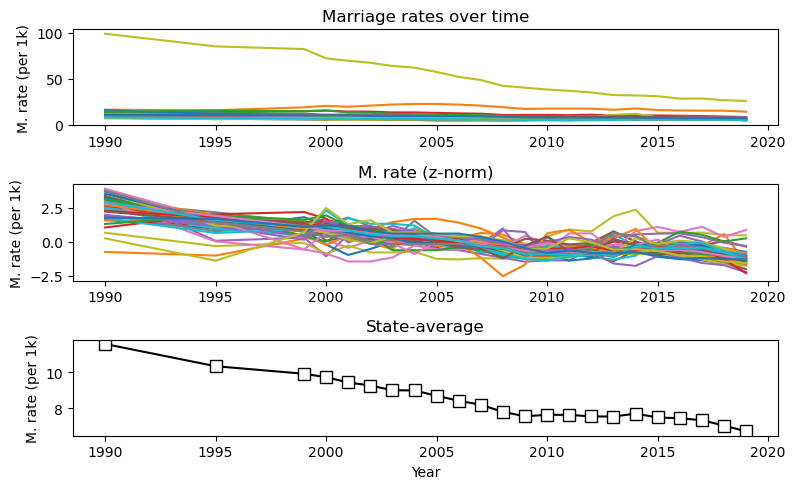

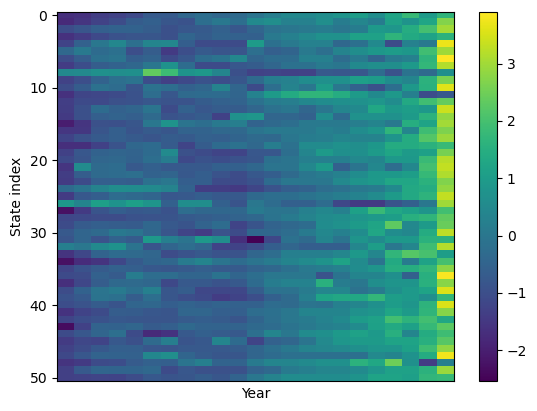

In [12]:
# make some plots

fig,ax = plt.subplots(3,1,figsize=(8,5))

# top plot - marriage rates over time
# note the yellow line which is one state that is a huge outlier
# The other states look like flat lines, but it could be because the outlier is skewing the y axis scale - so they look flat really zoomed out etc.
ax[0].plot(yearM,M.T) # note how we transpose the matrix with .T to pass in to the plot
ax[0].set_ylabel('M. rate (per 1k)')
ax[0].set_title('Marriage rates over time')


# Now we want to re-plot so that all the states have the same numerical range using the z-score to normalize
# note how we don't see the outlier anymore and all of the states are generally on downwards trend over time
ax[1].plot(yearM,stats.zscore(M.T)) # use the stats.zscore() method passing in the data matrix (transposed)
ax[1].set_ylabel('M. rate (per 1k)')
ax[1].set_title('M. rate (z-norm)')


# left off at 11:00
# notice that x-axis is non-constant
ax[2].plot(yearM,np.mean(M,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('M. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
# QUESTION: Is this the same as the US average?

plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(M,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.colorbar()
plt.show()

In [ ]:
# barplot of average marriage rate

# average over time
meanMarriageRate = np.mean(M,axis=1)

# sort index
sidx_M = np.argsort(meanMarriageRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesM.iloc[sidx_M],meanMarriageRate[sidx_M])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

# QUESTION:
#   Is Nevada a non-representative datapoint or an error?


In [ ]:
# show the correlation matrix

plt.imshow(np.corrcoef(M.T),vmin=.9,vmax=1,
             extent=[yearM[0],yearM[-1],yearM[-1],yearM[0]])
plt.colorbar()
plt.show()

In [ ]:
# PCA

pca = PCA().fit(M)

# scree plot
plt.plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of marriage data')
plt.show()
100*pca.explained_variance_ratio_

# Repeat for divorce data

In [ ]:
# import the data
data = pd.read_excel(divorce_url,header=5)
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data = data.replace({'---': np.nan})
data.fillna(data.median(), inplace=True)
yearD = data.columns[1:].to_numpy().astype(float)
statesD = data.iloc[:,0]
D = data.iloc[:,1:].to_numpy()

In [ ]:
# make some plots
fig,ax = plt.subplots(3,1,figsize=(8,5))

ax[0].plot(yearD,D.T)
ax[0].set_ylabel('D. rate (per 1k)')
ax[0].set_title('Divorce rates over time')

ax[1].plot(yearD,stats.zscore(D.T))
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('D. rate (z-norm)')

# notice that x-axis is non-constant
ax[2].plot(yearD,np.mean(D,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('D. rate (per 1k)')
ax[2].set_title('State-average')
ax[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

plt.imshow(stats.zscore(D,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('Year')
plt.ylabel('State index')
plt.show()





# barplot of average marriage rate
meanDivorceRate = np.mean(D,axis=1)
sidx_D = np.argsort(meanDivorceRate)

fig = plt.figure(figsize=(12,4))
plt.bar(statesD.iloc[sidx_D],meanDivorceRate[sidx_D])
plt.xticks(rotation=90)
plt.ylabel('D. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()






# show the correlation matrix
plt.imshow(np.corrcoef(D.T),vmin=.9,vmax=1,
             extent=[yearD[0],yearD[-1],yearD[-1],yearD[0]])
plt.colorbar()
plt.show()





# PCA
pca = PCA().fit(D)

# scree plot
plt.plot(pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('Percent variance explained')
plt.xlabel('Component number')
plt.title('PCA scree plot of divorce data')
plt.show()

In [ ]:
# check if marriage and divorce datasets have the same year/state order

# should be zero
print( 'Comparison of year vectors: ')
print( np.sum(yearD-yearM) )

# should be TRUE
print('')
print( 'Comparison of states vectors: ')
print( statesM.equals(statesD) )
# ... uh oh...

# compare
tmpStateNames = pd.concat([statesM,statesD],axis=1)
print(tmpStateNames)

# find the difference
np.where(tmpStateNames.iloc[:,0] != tmpStateNames.iloc[:,1])

In [ ]:
# btw, you can also correlate over states

fig = plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(D),vmin=0,vmax=1)
plt.xticks(ticks=range(len(statesD)),labels=statesD,rotation=90)
plt.yticks(ticks=range(len(statesD)),labels=statesD)
plt.colorbar()
plt.show()

# Now for some inferential statistics

In [ ]:
# Correlate M and D over time per state


# Bonferroni corrected threshold
pvalThresh = .05/51


fig = plt.figure(figsize=(6,10))

color = 'rg'
for si in range(len(statesM)):
    
    # compute correlation
    r,p = stats.pearsonr(M[si,:],D[si,:])
    
    # plot the data point
    plt.plot([r,1],[si,si],'-',color=[.5,.5,.5])
    plt.plot(r,si,'ks',markerfacecolor=color[bool(p<pvalThresh)])

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-divorce correlations per state')
plt.yticks(range(len(statesM)),labels=statesD)
plt.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,51])
plt.plot([0,0],[-1,51],'k--')
plt.show()

In [ ]:
# have marriage/divorce rates really declined over time?

fig,ax = plt.subplots(2,1,figsize=(12,6))


# initialize slope differences vector
MvsD = np.zeros(len(statesM))

for rowi in range(len(statesM)):
    
    # run regression (includes the intercept!)
    bM,intercept,r,pM,seM = stats.linregress(yearM,M[rowi,:])
    bD,intercept,r,pD,seD = stats.linregress(yearM,D[rowi,:])
    
    # normalize beta coefficients
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi,rowi],[bM-bD, 0],'k-',color=[.7,.7,.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[.7,.7,.7])
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD



# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD,rotation=90)
    ax[i].set_xlim([-1,51])
    ax[i].plot([-1,52],[0,0],'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')



### ttest on whether the M-vs-D rates are really different
t,p = stats.ttest_1samp(MvsD,0)
df = len(MvsD)-1

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df,t,p))

plt.tight_layout()
plt.show()